Final Algorithm

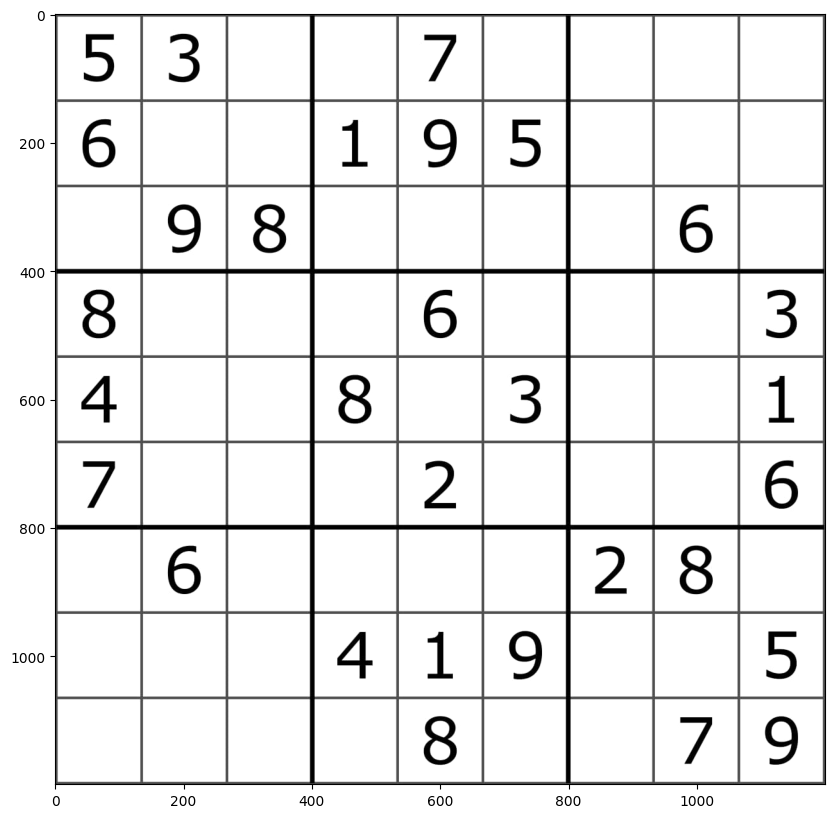

(10, 784)
5 3 1 | 6 7 8 | 2 9 4 
6 2 4 | 1 9 5 | 3 8 7 
7 9 8 | 2 3 4 | 1 6 5 
----------------------
8 1 2 | 4 6 5 | 7 9 3 
4 6 9 | 8 7 3 | 2 5 1 
7 3 5 | 1 2 9 | 4 8 6 
----------------------
1 6 9 | 3 5 7 | 2 8 4 
2 7 8 | 4 1 9 | 3 6 5 
3 4 5 | 2 8 6 | 1 7 9 


<ipython-input-8-4d556e67fcb8>:156: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9, 9, i+1)


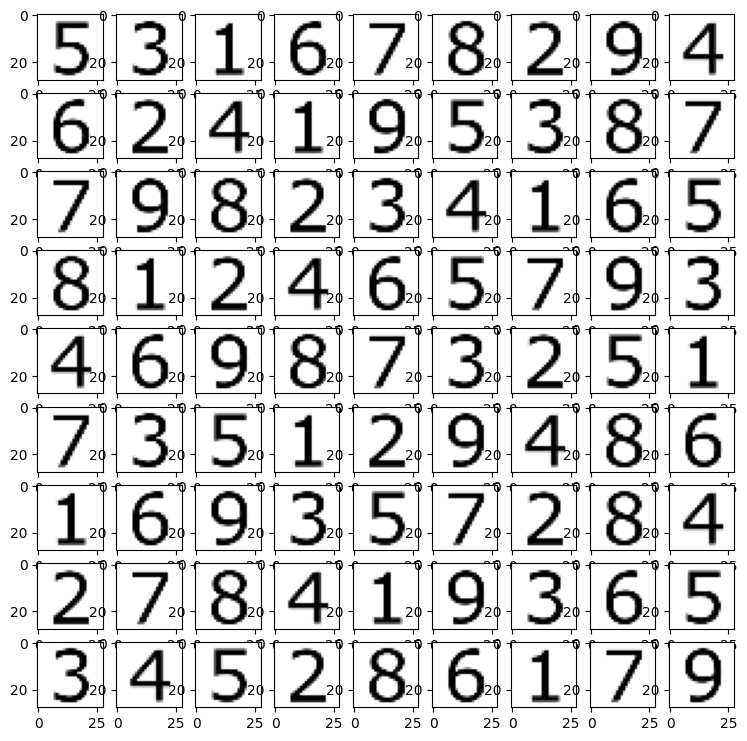

In [8]:
N = 9
import numpy as np
import matplotlib.pyplot as plt
import cv2

def print_this_matrix(matrix):
    for i in range(9):
        for j in range(9):
            print(matrix[i][j], end=" ")
            
            if j==2:
                print("| ", end="")
            if j==5:
                print("| ", end="")
        if i==2:
            print("\n----------------------", end='\n')
        elif i==5:
            print("\n----------------------", end='\n')
        else:
            print()
 
def check_valid_assignment(matrix, r, c, digit):
   
  # Check the row
    for i in range(9):
        if matrix[r][i] == digit:
            return False
 
  # Check the column
    for x in range(9):
        if matrix[i][c] == digit:
            return False
 
  #Check submatrix
    submatrix_upper_row_index = r - r % 3
    submatrix_leftmost_column_index = c - c % 3
    for i in range(3):
        for j in range(3):
            if matrix[i + submatrix_upper_row_index][j + submatrix_leftmost_column_index] == digit:
                return False
    return True


def assign_values(matrix, r, c):
 # Stopping Condition
    if (r == N - 1 and c == N):
        return True
# If we come to the last column, we iterate through the next row, column 0
    if c == N:
        r += 1
        c = 0
# If value is already assigned, we go to next column
    if matrix[r][c] > 0:
        return assign_values(matrix, r, c + 1)
    for num in range(1, N + 1, 1):
        if check_valid_assignment(matrix, r, c, num):
            matrix[r][c] = num
 # Checking for next possibility with next column
            if assign_values(matrix, r, c + 1):
                return True
#Case of wrong assignment
        matrix[r][c] = 0
    return False
 
# if (assign_values(matrix, 0, 0)):
#     print_this_matrix(matrix)
# else:
#     print("The Solution Does Not Exist")

import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/sample 2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()

# image_gray.flatten
im1=image_gray

xtest=[]
imgwidth, imgheight = im1.shape
width=imgwidth//9
height=imgheight//9
for i in range(0,imgheight,height):
  for j in range(0,imgwidth,width):
    box = (j, i, j+width, i+height)
    a = im1[i+20:i+height-20, j+20:j+width-20]
    try:
      a = cv2.resize(a, (28,28))
    except:
      break
    xtest.append(a)
    # plt.figure(figsize=(5,5))
    # plt.imshow(a, cmap='gray')
    # plt.show()
# a1=xtest[0]
# print(xtest)
for i in range(len(xtest)):
  xtest[i]=xtest[i].flatten()
# print(xtest)
xtrain=np.array([xtest[0], xtest[1], xtest[2], xtest[4], xtest[9], xtest[12], xtest[13], xtest[20], xtest[36], xtest[49]])
ytrain=[5, 3, 0, 7, 6, 1, 9, 8, 4, 2]

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# a1=(cv2.resize(cv2.imread('/content/1.png'), (40,30)))

# x1=[(cv2.resize(cv2.imread('/content/1.png'), (40,30))), (cv2.resize(cv2.imread('/content/2.png'), (40,30))), (cv2.resize(cv2.imread('/content/3.png'), (40,30))), (cv2.resize(cv2.imread('/content/4.png'), (40,30))), (cv2.resize(cv2.imread('/content/5.png'), (40,30))), (cv2.resize(cv2.imread('/content/6.png'), (40,30))), (cv2.resize(cv2.imread('/content/7.png'), (40,30))),(cv2.resize(cv2.imread('/content/8.png'), (40,30))), (cv2.resize(cv2.imread('/content/9.png'), (40,30)))]
# y1=[1,2,3,4,5,6,7,8,9]

print(xtrain.shape)

from sklearn.naive_bayes import GaussianNB
model=KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain, ytrain)

ytest=[]
for img in xtest:
  ytest.append(model.predict(img[np.newaxis, :]))
for i in range(len(ytest)):
  ytest[i]=int(ytest[i])
  
# print(ytest)

ytest=np.array(ytest)
y1=ytest.reshape((9,9))
y1
if (assign_values(y1, 0, 0)):
    print_this_matrix(y1)
else:
    print("The Solution Does Not Exist")
y_img=[]

for i in range(len(ytest)):
  for j in range(len(ytrain)):
    if ytest[i]==ytrain[j]:
      xtrain[j].reshape(28,28)
      y_img.append(xtrain[j])
y_img=np.array(y_img)

y_img.shape
# y_img.reshape(9,9)
yfinal=[]
for i in range(9):
  lis=[]
  for j in range(9):
    lis.append(y_img[9*i+j].reshape(28,28))

  yfinal.append(lis)
fig = plt.figure(figsize=(9,9))

gs = fig.add_gridspec(9, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(81):
  plt.subplot(9, 9, i+1)
  plt.imshow(y_img[i].reshape(28,28), cmap='gray')
  # plt.axis('off')

Algorithm for solving a 9X9 sudoku 

In [1]:
N = 9


def print_this_matrix(matrix):
    for i in range(9):
        for j in range(9):
            print(matrix[i][j], end=" ")
            
            if j==2:
                print("| ", end="")
            if j==5:
                print("| ", end="")
        if i==2:
            print("\n----------------------", end='\n')
        elif i==5:
            print("\n----------------------", end='\n')
        else:
            print()
 
def check_valid_assignment(matrix, r, c, digit):
   
  # Check the row
    for i in range(9):
        if matrix[r][i] == digit:
            return False
 
  # Check the column
    for x in range(9):
        if matrix[i][c] == digit:
            return False
 
  #Check submatrix
    submatrix_upper_row_index = r - r % 3
    submatrix_leftmost_column_index = c - c % 3
    for i in range(3):
        for j in range(3):
            if matrix[i + submatrix_upper_row_index][j + submatrix_leftmost_column_index] == digit:
                return False
    return True


def assign_values(matrix, r, c):
 # Stopping Condition
    if (r == N - 1 and c == N):
        return True
# If we come to the last column, we iterate through the next row, column 0
    if c == N:
        r += 1
        c = 0
# If value is already assigned, we go to next column
    if matrix[r][c] > 0:
        return assign_values(matrix, r, c + 1)
    for num in range(1, N + 1, 1):
        if check_valid_assignment(matrix, r, c, num):
            matrix[r][c] = num
 # Checking for next possibility with next column
            if assign_values(matrix, r, c + 1):
                return True
#Case of wrong assignment
        matrix[r][c] = 0
    return False
 
# if (assign_values(matrix, 0, 0)):
#     print_this_matrix(matrix)
# else:
#     print("The Solution Does Not Exist")

Plotting the Empty Sudoku

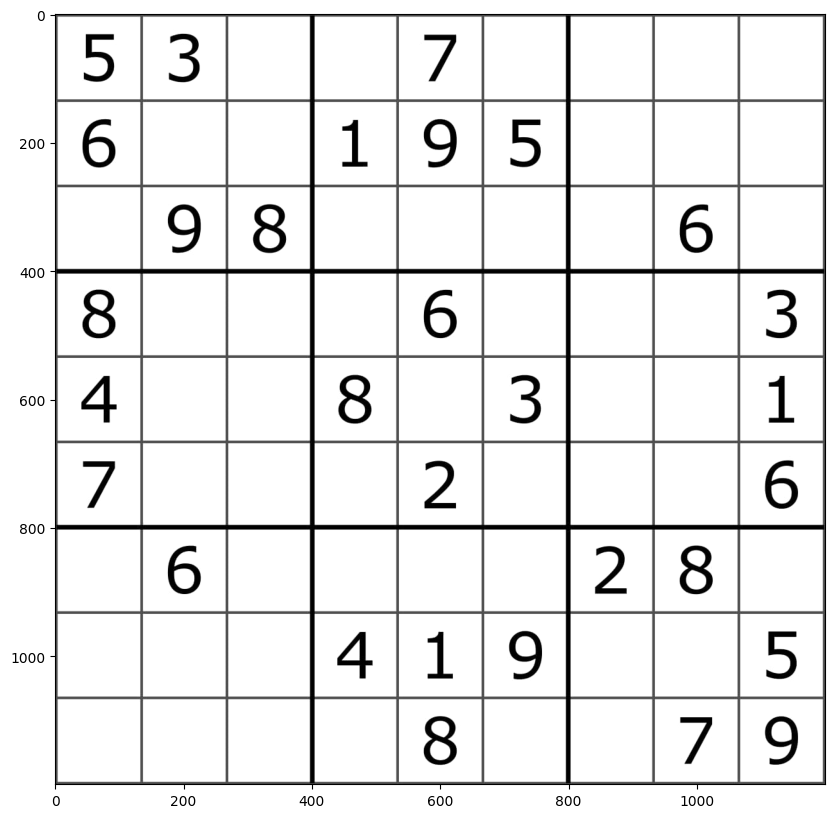

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/sample 2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()


In [ ]:
print(image_gray.shape)

(1200, 1200)


In [ ]:
# image_gray.flatten
im1=image_gray

Splitting and cropping the image into 81 images of each digit

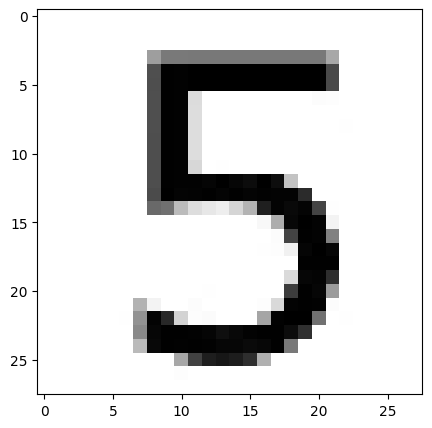

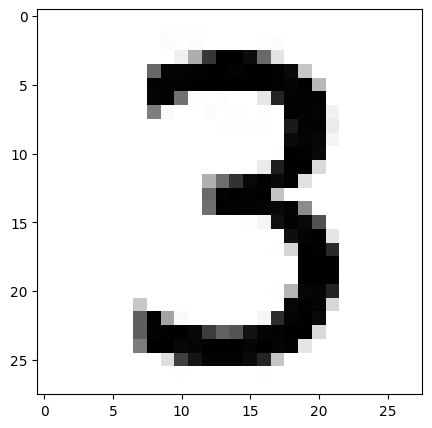

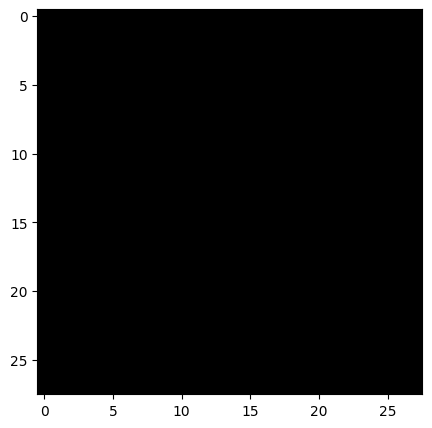

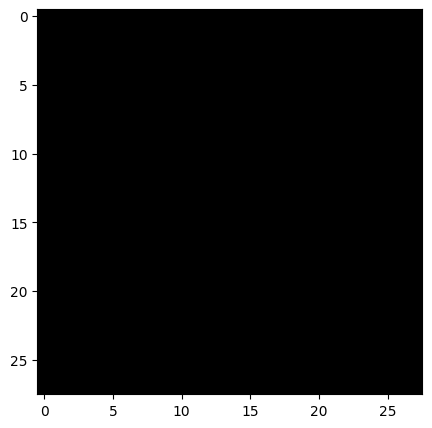

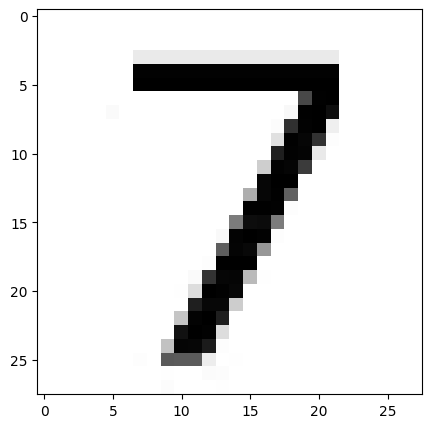

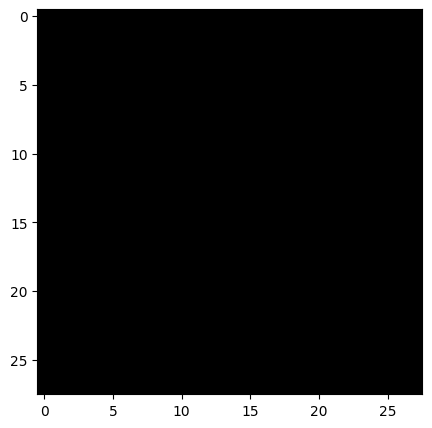

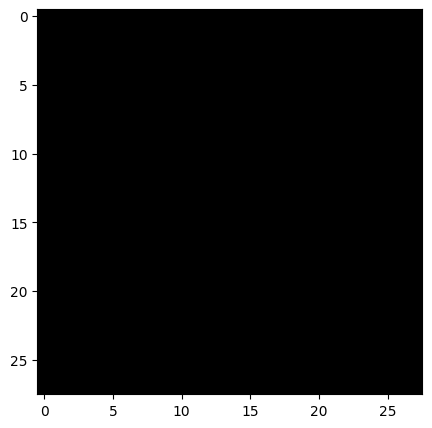

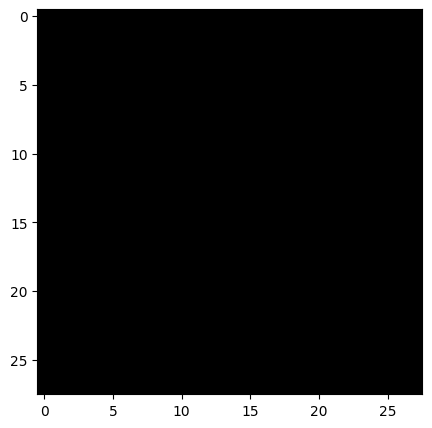

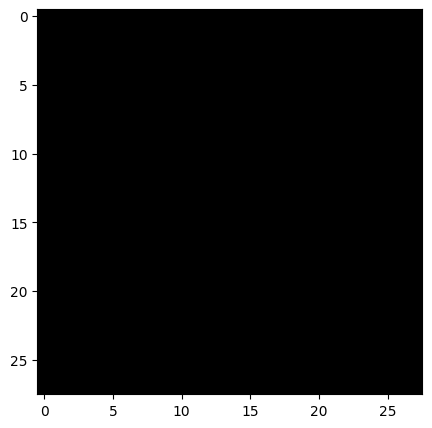

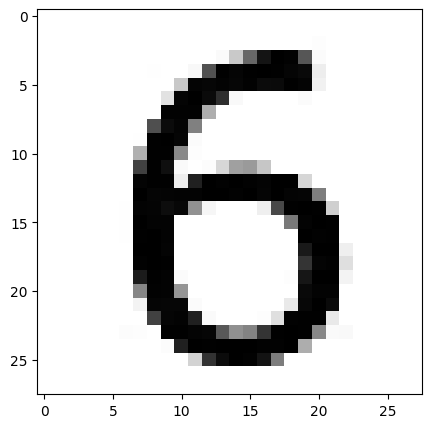

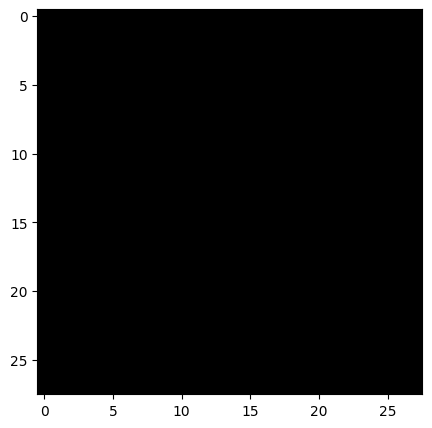

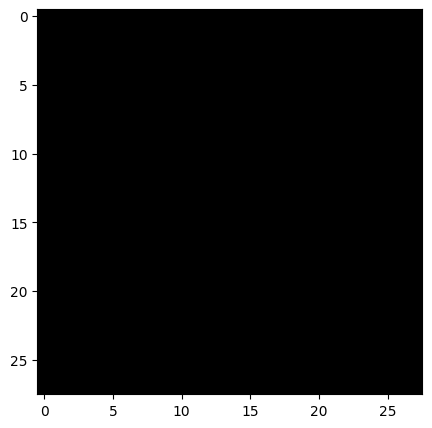

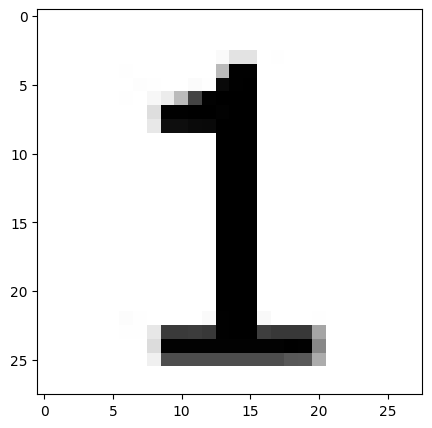

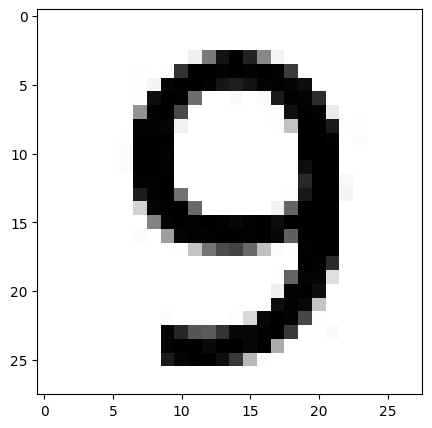

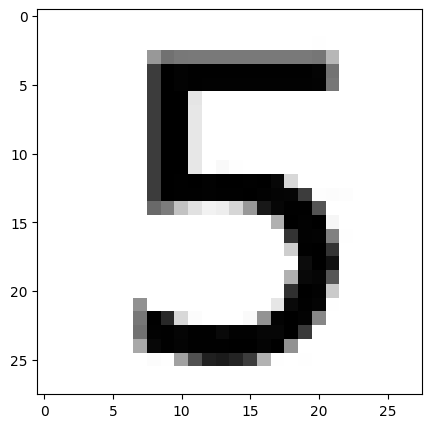

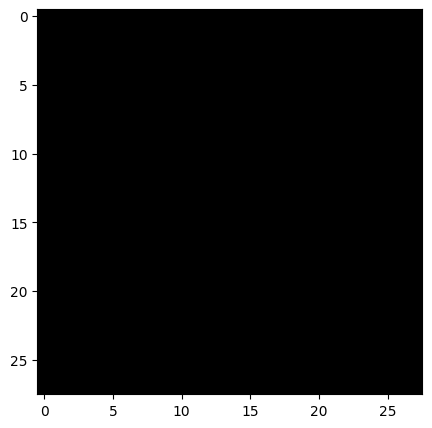

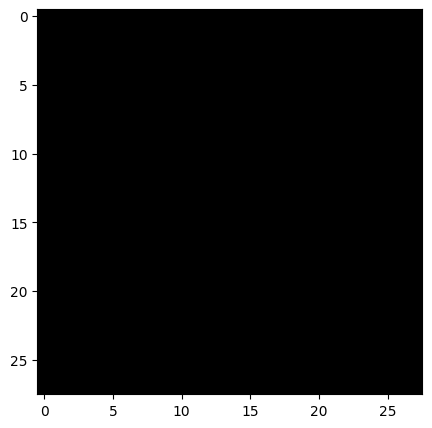

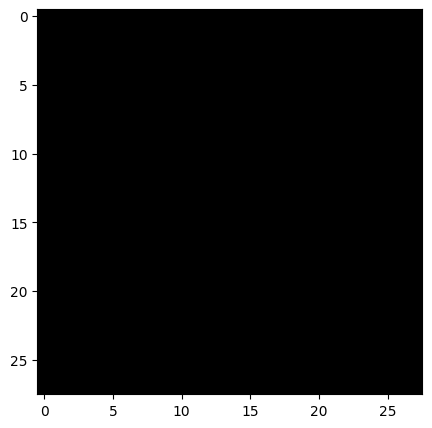

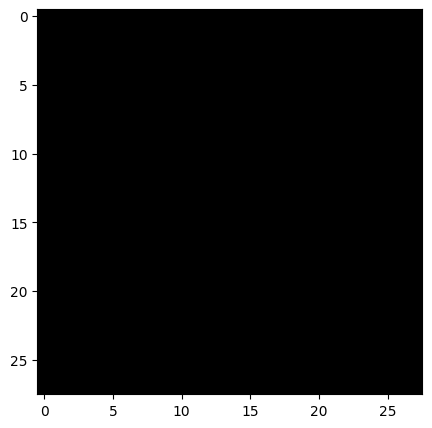

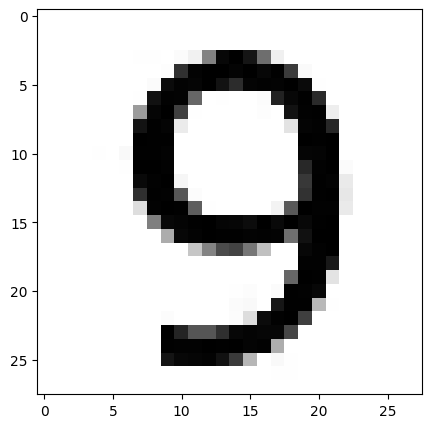

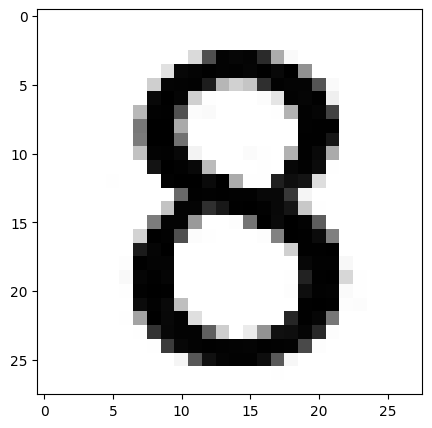

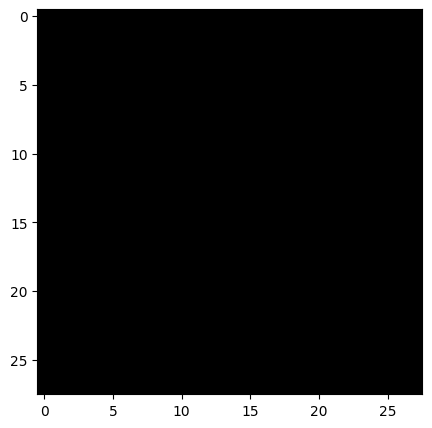

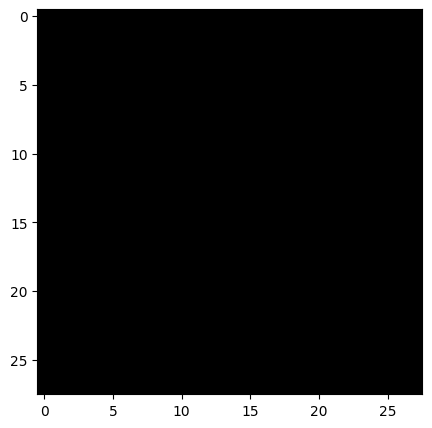

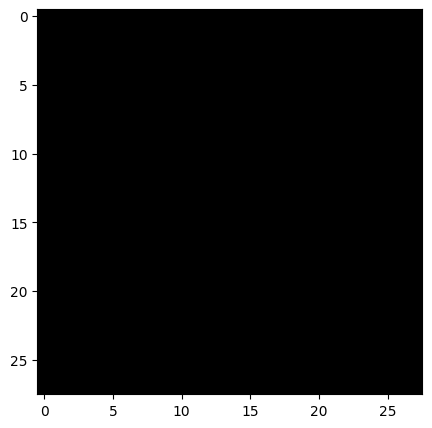

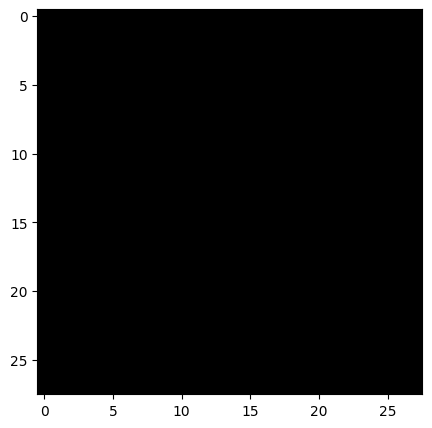

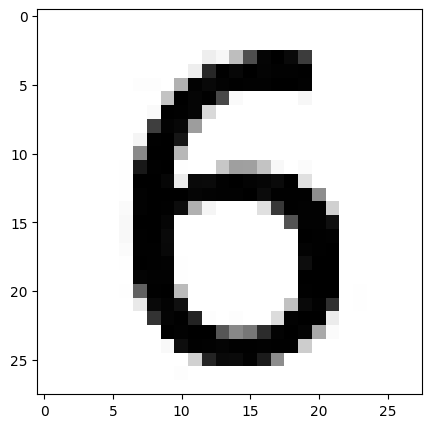

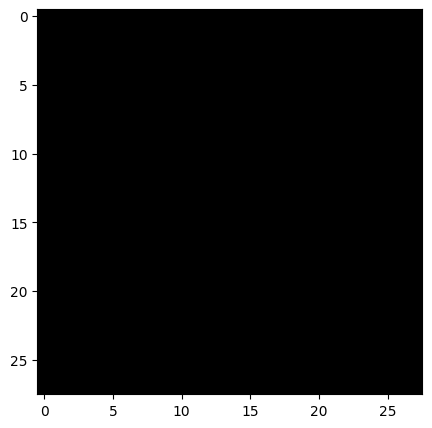

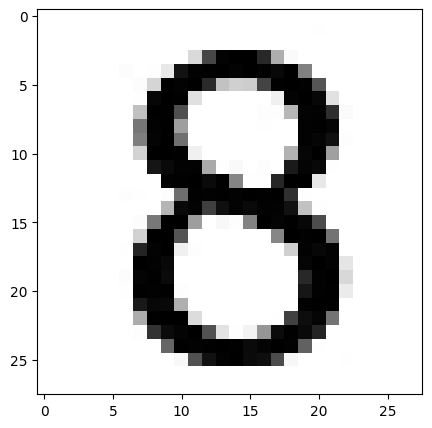

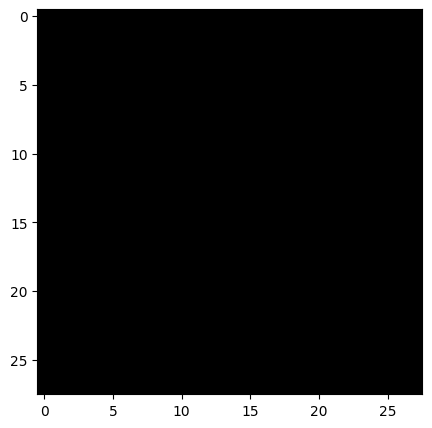

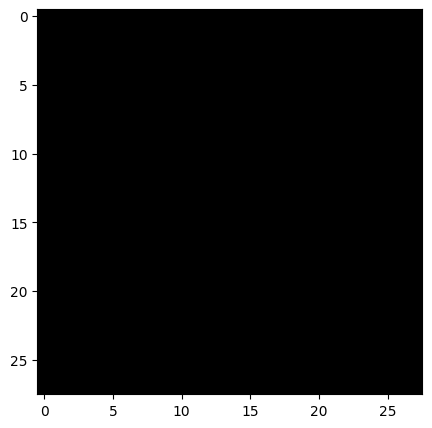

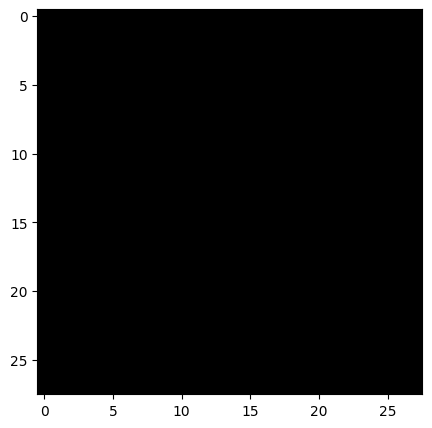

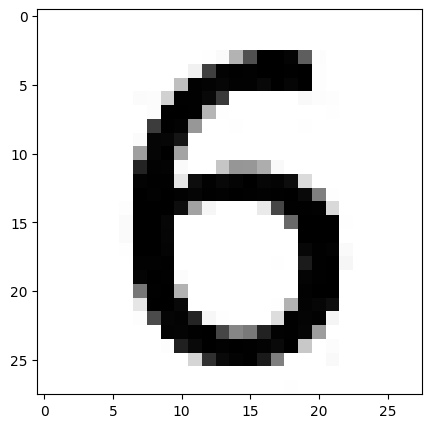

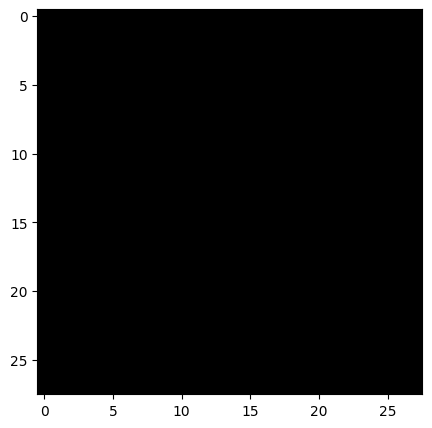

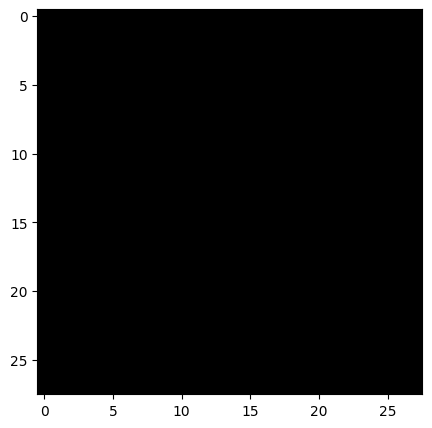

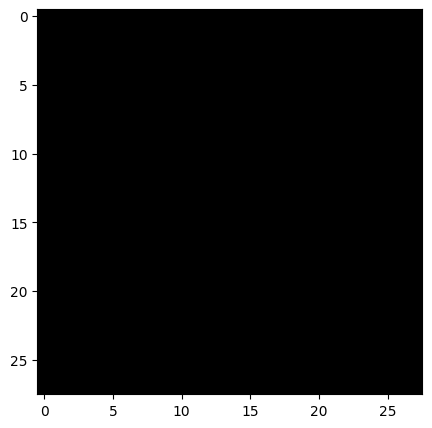

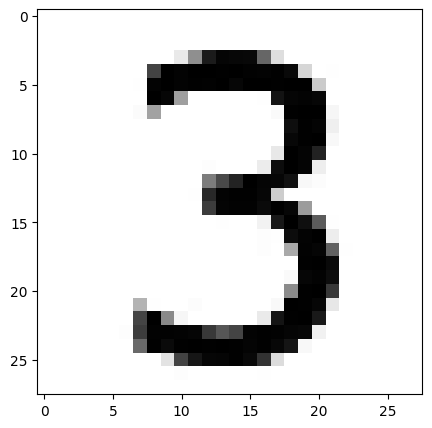

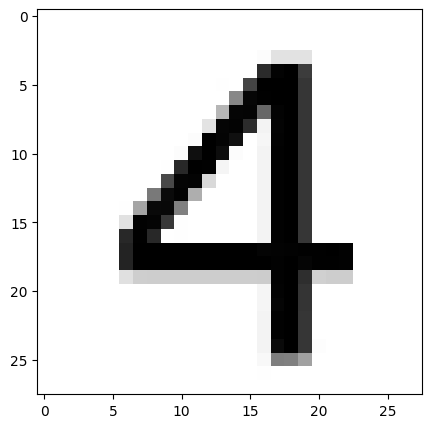

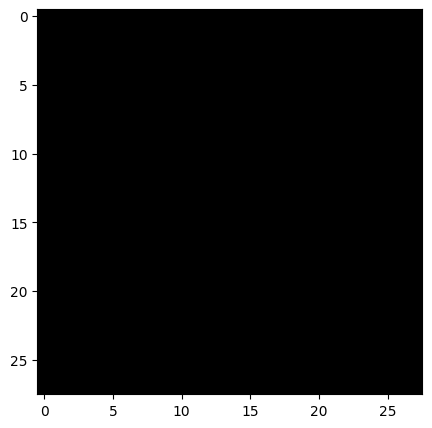

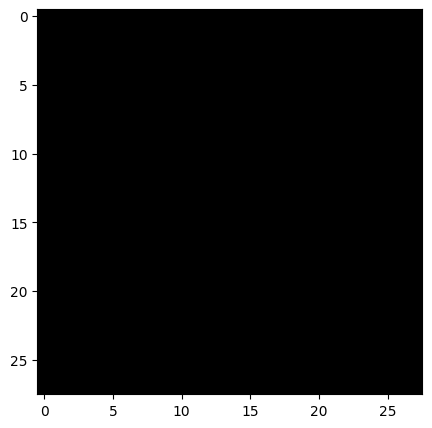

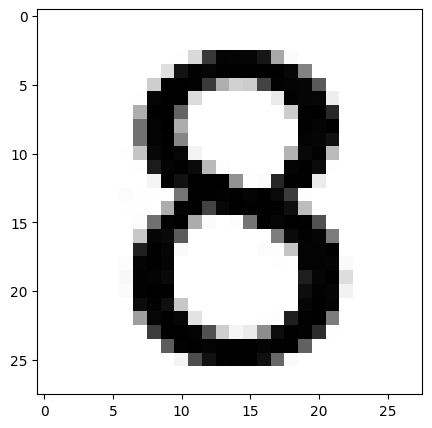

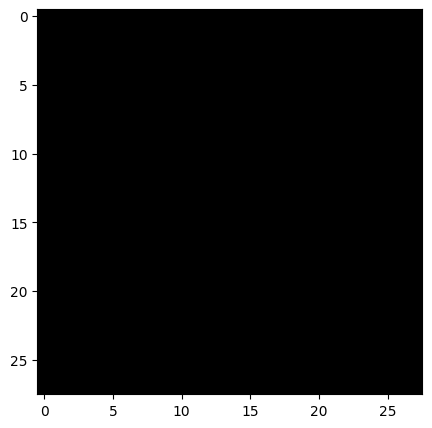

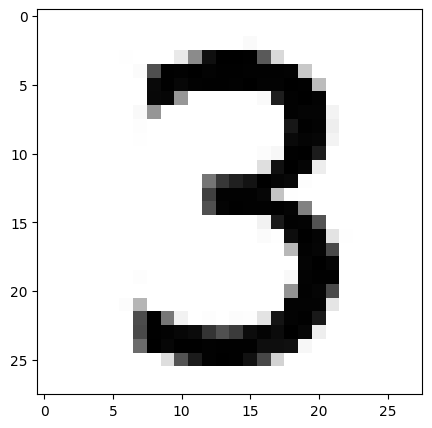

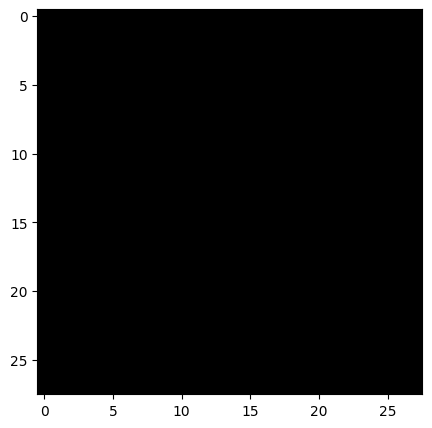

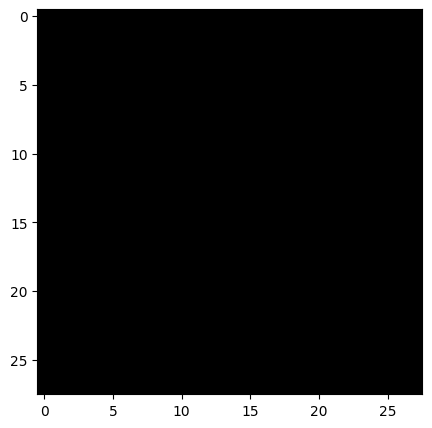

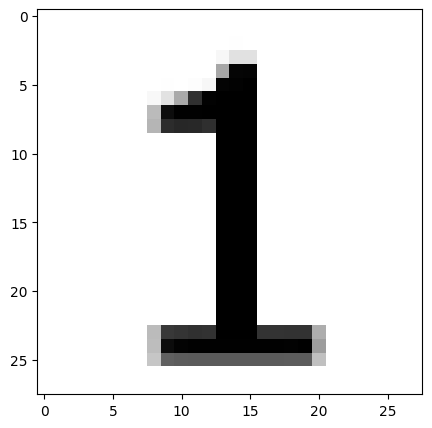

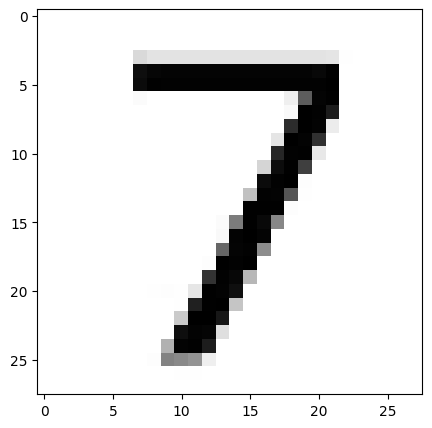

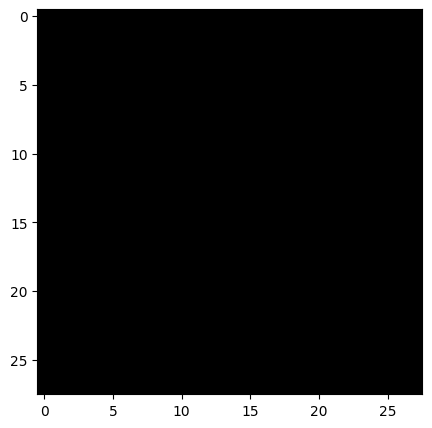

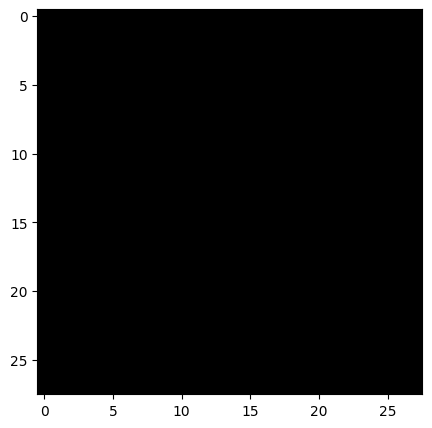

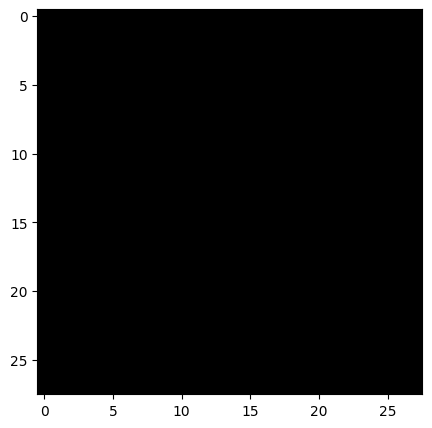

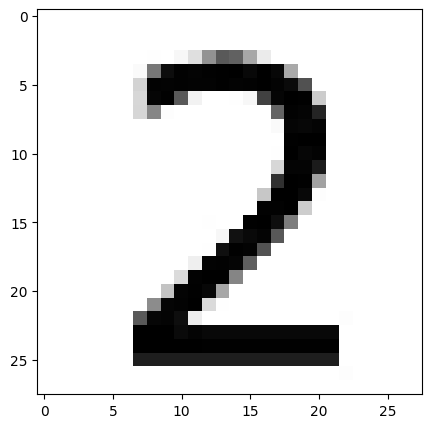

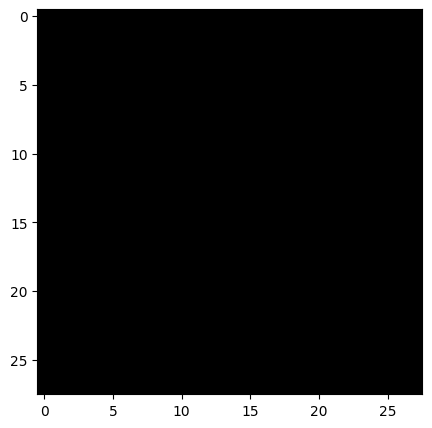

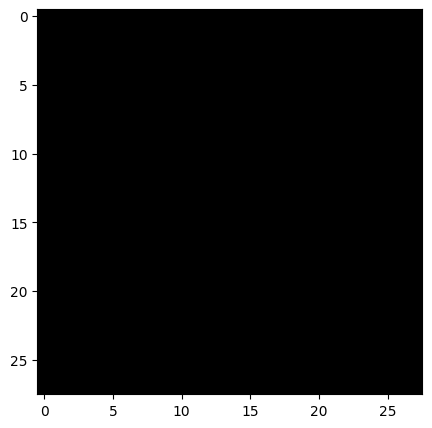

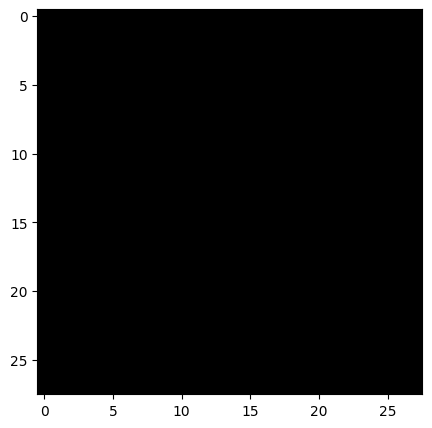

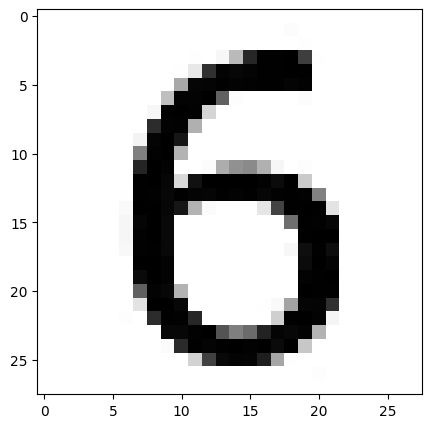

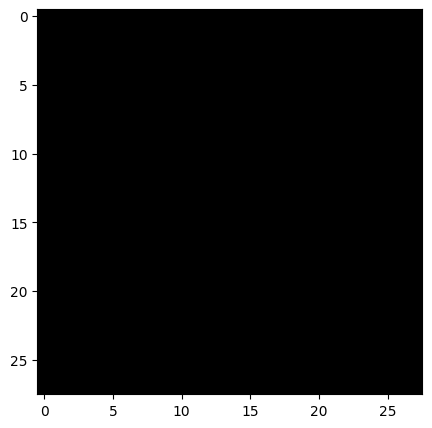

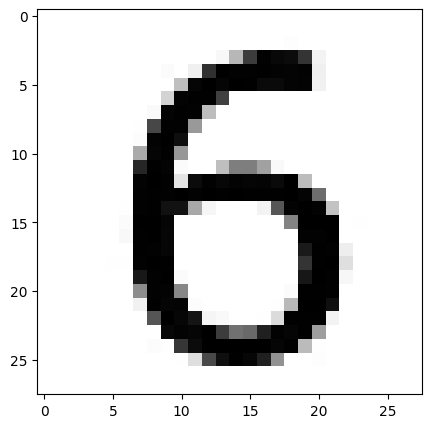

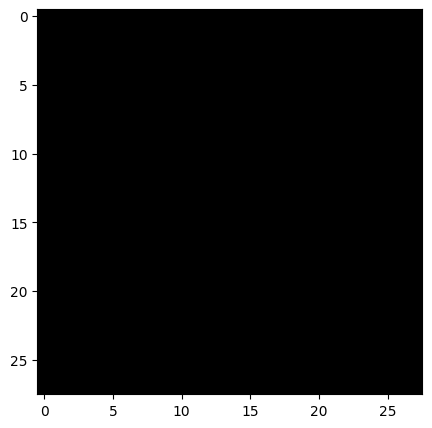

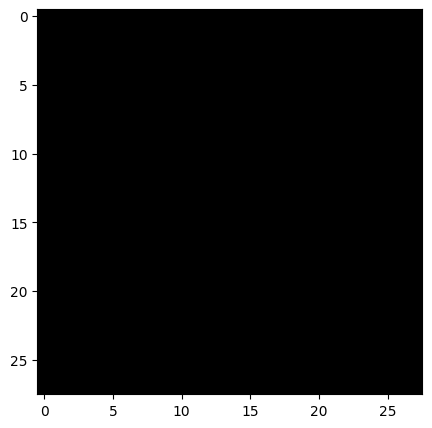

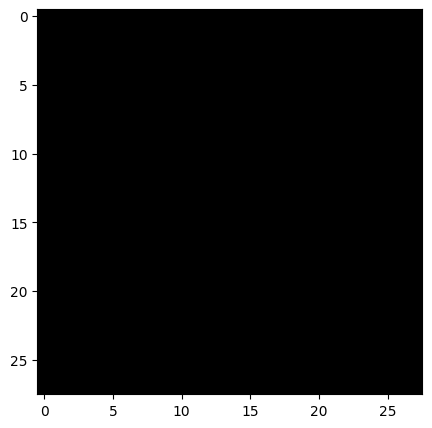

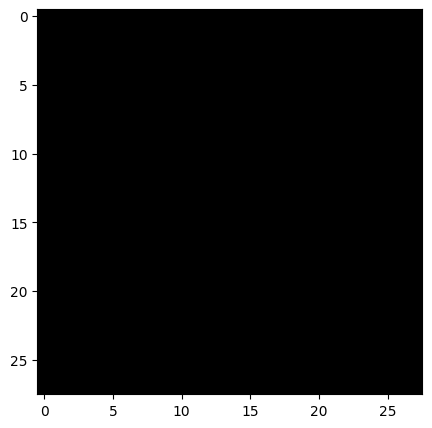

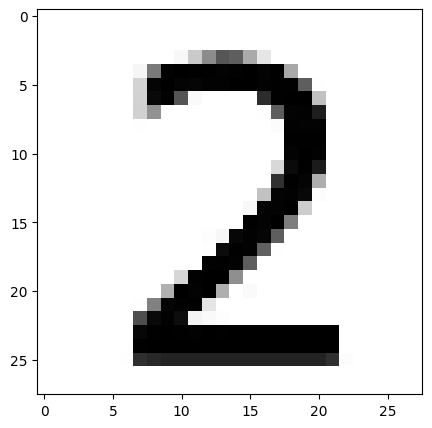

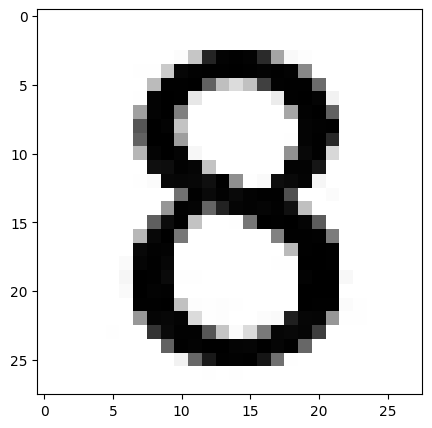

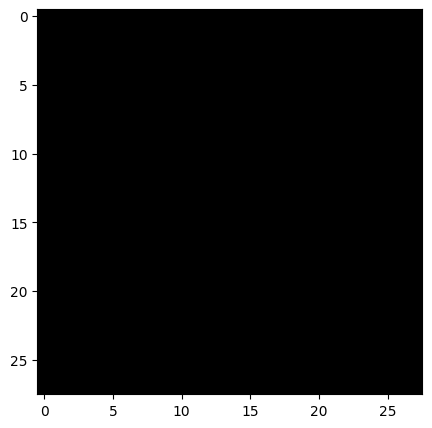

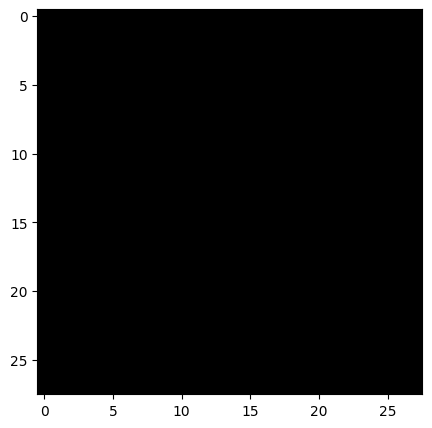

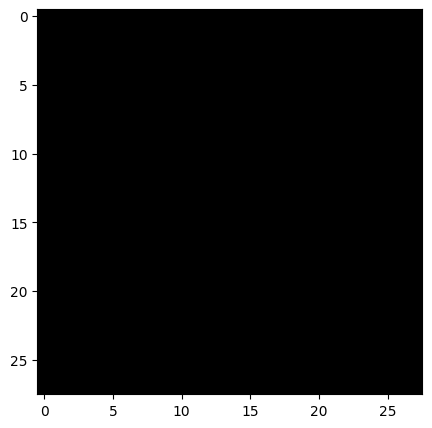

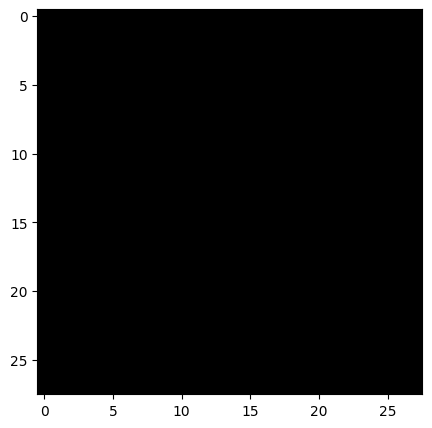

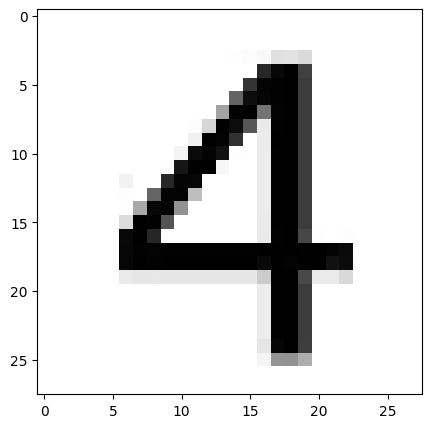

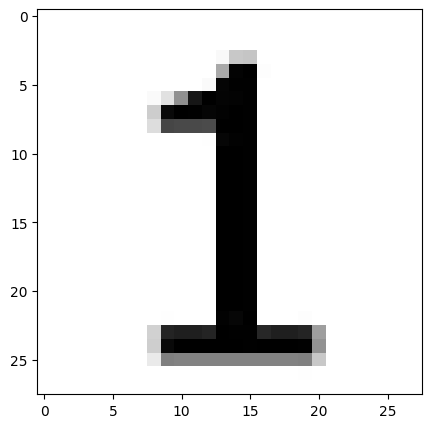

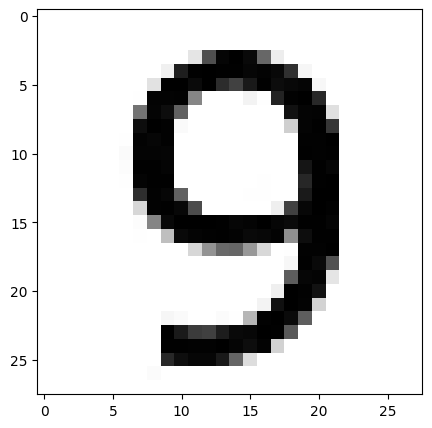

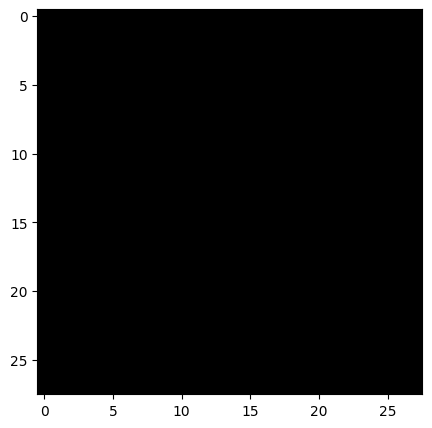

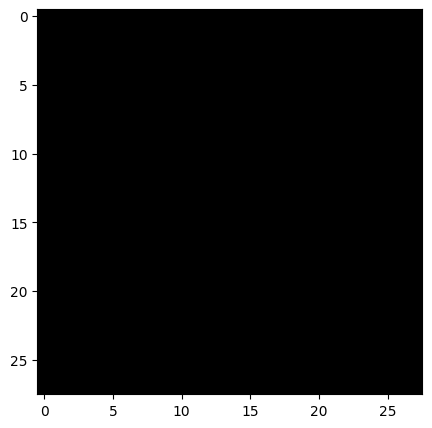

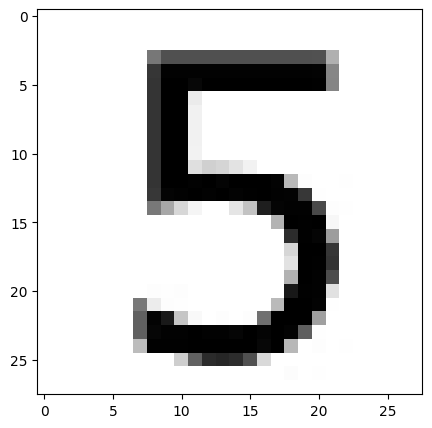

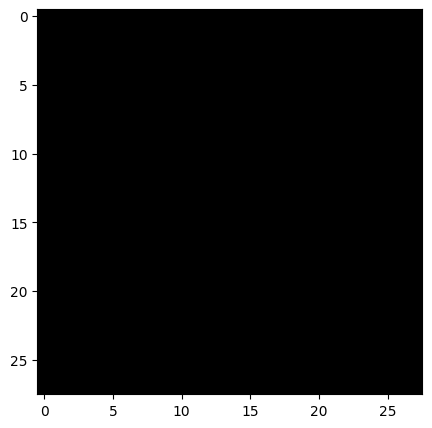

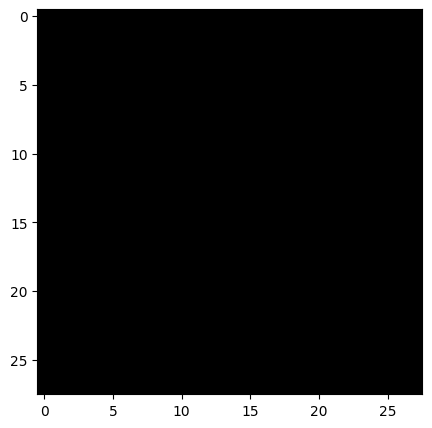

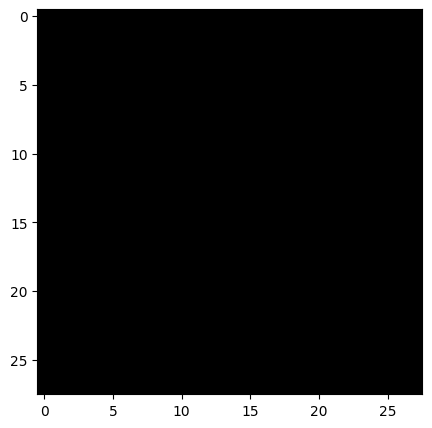

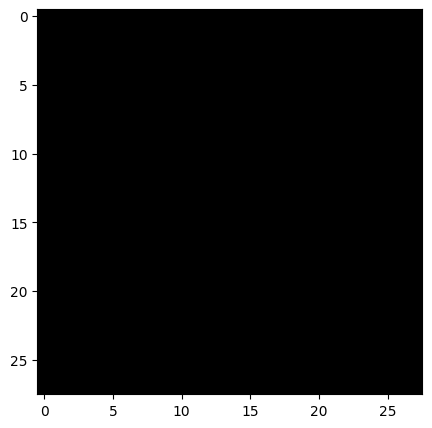

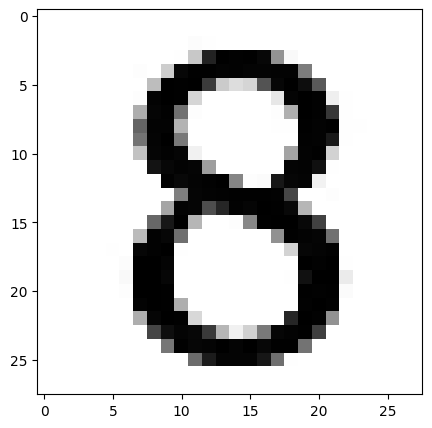

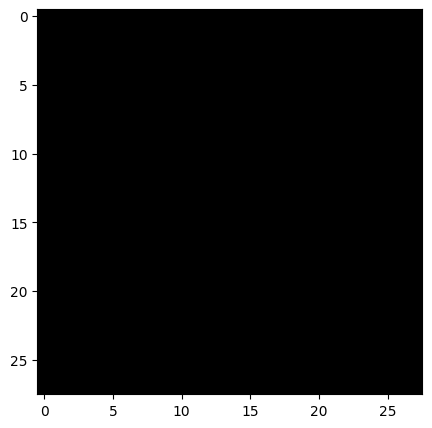

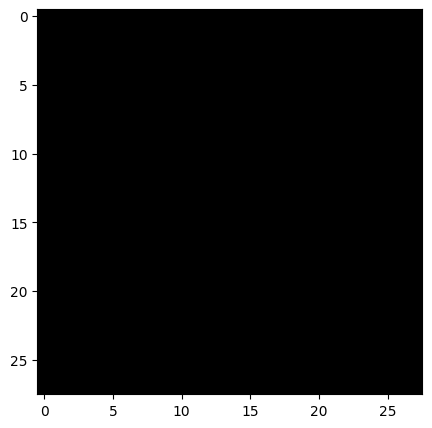

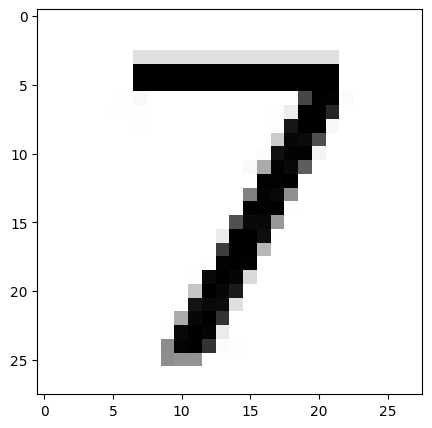

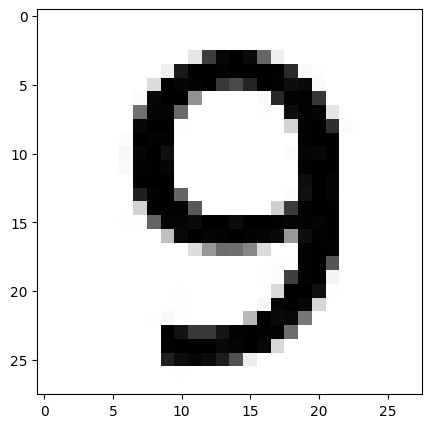

In [ ]:
xtest=[]
imgwidth, imgheight = im1.shape
width=imgwidth//9
height=imgheight//9
for i in range(0,imgheight,height):
  for j in range(0,imgwidth,width):
    box = (j, i, j+width, i+height)
    a = im1[i+20:i+height-20, j+20:j+width-20]
    try:
      a = cv2.resize(a, (28,28))
    except:
      break
    xtest.append(a)
    plt.figure(figsize=(5,5))
    plt.imshow(a, cmap='gray')
    plt.show()

Preparing the dataset for training the KNN algorithm using the images from this sudoku. We can also use the MNIST dataset, but the accuracy was less. This dataset will be different for different Sudokus.

In [ ]:
# a1=xtest[0]
# print(xtest)
for i in range(len(xtest)):
  xtest[i]=xtest[i].flatten()
# print(xtest)
xtrain=np.array([xtest[0], xtest[1], xtest[2], xtest[4], xtest[9], xtest[12], xtest[13], xtest[20], xtest[36], xtest[49]])
ytrain=[5, 3, 0, 7, 6, 1, 9, 8, 4, 2]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# a1=(cv2.resize(cv2.imread('/content/1.png'), (40,30)))

# x1=[(cv2.resize(cv2.imread('/content/1.png'), (40,30))), (cv2.resize(cv2.imread('/content/2.png'), (40,30))), (cv2.resize(cv2.imread('/content/3.png'), (40,30))), (cv2.resize(cv2.imread('/content/4.png'), (40,30))), (cv2.resize(cv2.imread('/content/5.png'), (40,30))), (cv2.resize(cv2.imread('/content/6.png'), (40,30))), (cv2.resize(cv2.imread('/content/7.png'), (40,30))),(cv2.resize(cv2.imread('/content/8.png'), (40,30))), (cv2.resize(cv2.imread('/content/9.png'), (40,30)))]
# y1=[1,2,3,4,5,6,7,8,9]

print(xtrain.shape)

from sklearn.naive_bayes import GaussianNB
model=KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain, ytrain)

(10, 784)


KNeighborsClassifier(n_neighbors=1)

Predicting the digits and storing them into 9X9 array

In [ ]:
ytest=[]
for img in xtest:
  ytest.append(model.predict(img[np.newaxis, :]))

In [ ]:
ytest

[array([5]),
 array([3]),
 array([0]),
 array([0]),
 array([7]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([6]),
 array([0]),
 array([0]),
 array([1]),
 array([9]),
 array([5]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([9]),
 array([8]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([6]),
 array([0]),
 array([8]),
 array([0]),
 array([0]),
 array([0]),
 array([6]),
 array([0]),
 array([0]),
 array([0]),
 array([3]),
 array([4]),
 array([0]),
 array([0]),
 array([8]),
 array([0]),
 array([3]),
 array([0]),
 array([0]),
 array([1]),
 array([7]),
 array([0]),
 array([0]),
 array([0]),
 array([2]),
 array([0]),
 array([0]),
 array([0]),
 array([6]),
 array([0]),
 array([6]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([2]),
 array([8]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([4]),
 array([1]),
 array([9]),
 array([0]),
 array([0]),
 array([5]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([8]),

In [ ]:
for i in range(len(ytest)):
  ytest[i]=int(ytest[i])
  
print(ytest)

[5, 3, 0, 0, 7, 0, 0, 0, 0, 6, 0, 0, 1, 9, 5, 0, 0, 0, 0, 9, 8, 0, 0, 0, 0, 6, 0, 8, 0, 0, 0, 6, 0, 0, 0, 3, 4, 0, 0, 8, 0, 3, 0, 0, 1, 7, 0, 0, 0, 2, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 2, 8, 0, 0, 0, 0, 4, 1, 9, 0, 0, 5, 0, 0, 0, 0, 8, 0, 0, 7, 9]


In [ ]:
ytest=np.array(ytest)
y1=ytest.reshape((9,9))
y1

array([[5, 3, 0, 0, 7, 0, 0, 0, 0],
       [6, 0, 0, 1, 9, 5, 0, 0, 0],
       [0, 9, 8, 0, 0, 0, 0, 6, 0],
       [8, 0, 0, 0, 6, 0, 0, 0, 3],
       [4, 0, 0, 8, 0, 3, 0, 0, 1],
       [7, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 6, 0, 0, 0, 0, 2, 8, 0],
       [0, 0, 0, 4, 1, 9, 0, 0, 5],
       [0, 0, 0, 0, 8, 0, 0, 7, 9]])

Running the sudoku solving algorithm

In [ ]:
if (assign_values(y1, 0, 0)):
    print_this_matrix(y1)
else:
    print("The Solution Does Not Exist")

5 3 1 | 6 7 8 | 2 9 4 
6 2 4 | 1 9 5 | 3 8 7 
7 9 8 | 2 3 4 | 1 6 5 
----------------------
8 1 2 | 4 6 5 | 7 9 3 
4 6 9 | 8 7 3 | 2 5 1 
7 3 5 | 1 2 9 | 4 8 6 
----------------------
1 6 9 | 3 5 7 | 2 8 4 
2 7 8 | 4 1 9 | 3 6 5 
3 4 5 | 2 8 6 | 1 7 9 


In [ ]:
y_img=[]

for i in range(len(ytest)):
  for j in range(len(ytrain)):
    if ytest[i]==ytrain[j]:
      xtrain[j].reshape(28,28)
      y_img.append(xtrain[j])
y_img=np.array(y_img)

y_img.shape
# y_img.reshape(9,9)

(81, 784)

In [ ]:
yfinal=[]
for i in range(9):
  lis=[]
  for j in range(9):
    lis.append(y_img[9*i+j])
  yfinal.append(lis)


Plotting the sudoku matrix 

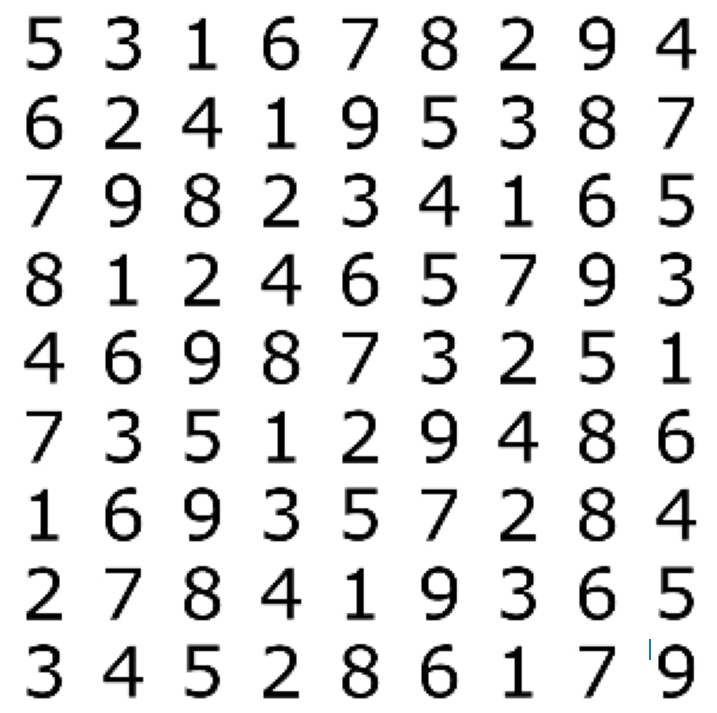

In [ ]:
plt.figure(figsize=(9,9))

for i in range(81):
  plt.subplot(9, 9, i+1)
  plt.imshow(y_img[i].reshape(28,28), cmap='gray')
  plt.axis('off')

Other Methods that could be used

*   Pytesseract
*   NumberRecognizer
*   Training KNN on MNIST dataset



In [ ]:
print(np.array(xtest).shape)
!pip install pytesseract
from pytesseract import pytesseract

ytest=[]
for img in xtest:
  if np.count_nonzero(img==0)<10:
    ytest.append(0)
  else:
    # Defining paths to tesseract.exe 
# and the image we would be using
    path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    pytesseract.tesseract_cmd = path_to_tesseract
    text = pytesseract.image_to_string(img)
    print(text[:-1])

print(ytest)

In [ ]:
!pip install number_recognition
from number_recognition import NumberRecognizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
n = NumberRecognizer()

n.init() # create a model
n.load() # load the model
for i in range(len(xtest)):
  num = n.recognize(xtest[i])
print(f"the number is {num}")

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2658 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1072 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0514 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0402 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0313 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0211 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0173 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.015

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9757
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object to 'str' for 'filename'
Error: Can't convert object

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import svm
mnist = fetch_openml('mnist_784')
image= mnist.data.to_numpy()

index_number= np.random.permutation(70000)
x1,y1=mnist.data.loc[index_number],mnist.target.loc[index_number]
x1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)


from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x1, y1)